# Introduction

This EDA (Exploratory Data Analysis) aims to analyze the dataset and to prove hypothesis based on main questions

# Import Libraries 

In [1]:
# Importing required libraries

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Loading of Dataset

In [2]:
# Loading dataset and drop unneeded labels

Diets_Dataset = pd.read_csv('./Diets_Dataset.csv')
Diets_Dataset.drop(columns=['Extraction_day','Extraction_time'],inplace=True)

In [3]:
# Example of records

Diets_Dataset.head(20)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01


In [4]:
# Naming main variables

Macronutrients = ['Carbs(g)','Protein(g)','Fat(g)']
Diets = ['dash', 'keto', 'mediterranean', 'paleo', 'vegan']

# Transformation of Macronutrient Values

For comparing the nutritional values (macronutrients) between the different types of diets, each macronutrient value was rescaled to its proportional contribution from the total macronutrients in each recipe.

This transformation will make it possible to analyze and compare the presence of each macronutrient in the different diets.

In [5]:
# Creating labels for total macronutrients supply

Diets_Dataset['Total_Macronutrients'] = Diets_Dataset[Macronutrients].apply(sum,axis=1)

In [6]:
# Transforming each macronutrient value into its proportional contribution

for macronutrient in Macronutrients:
    Diets_Dataset[macronutrient] /= Diets_Dataset['Total_Macronutrients']

# Analysis of Statistics by Type of Diet

For each type of diet, an analysis of the statistics obtained is presented in the context of what the specific diet means [[1]](#references).

## DASH

A recipe of this diet will have that, using the average, 55% of its macronutrients are carbohydrates that come from fruits, vegetables and whole grains; 25% are fats, which by their nature, are beneficial for the human body; and 20% are proteins, which come from margarine meats. 

Although it is said to be a healthy diet (for cardiovascular health) it does not imply a balance or equilibrium of the macronutrients consumed in a dish or portion. This is reflected in the percentages cited above.

Fifty percent of the recipes have between 33% and 76% of carbohydrates in their composition, which can also be observed in the standard deviation of this macronutrient.

This phenomenon also appears for proteins and fats, although to a lesser extent, but it does reflect a wide range in the composition of these macronutrients in the recipes. Specifically, 50% of the recipes have between 7% and 28% protein and between 10% and 37% fat.

This could mean that the recipes are varied because they favor the appearance of recipes with different macronutrient compositions and are not concentrated in a very short range of percentages of a certain macronutrient. In other words, it could be an indication that the recipes are balanced and balanced in their macronutrient composition. 

In [7]:
Diets_Dataset.query("Diet_type == 'dash'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1745.000000,1745.000000,1745.000000,1745.000000
mean,0.196241,0.549425,0.254334,330.968590
std,0.162871,0.278850,0.194078,337.469679
min,0.000000,0.001526,0.000000,0.060000
25%,0.068931,0.331143,0.103381,89.690000
50%,0.156626,0.555219,0.234742,239.870000
75%,0.282629,0.757917,0.371292,467.930000
max,0.833467,1.000000,0.973404,3450.250000


# Keto

A recipe of this diet will have, on average, 50% of its macronutrients are fats, this is related to the fact that it is intended to induce ketosis (the principle on which the keto diet is based), so a high value would be expected; 30% of its macronutrients are proteins, again, as it is intended to reduce the intake of carbohydrates, a high intake of proteins would be expected as compensation; and 20% are carbohydrates, highlighting that it is a low-carbohydrate diet.

Fifty percent of the recipes have between 40% and 60% fat in their composition, denoting a high-fat diet and that a large part of their recipes have a high concentration of fats (which are considered healthy). And 50% of the recipes also verify that they have between 8% and 26% carbohydrates in their composition, again verifying the fact that they want to induce ketosis by minimizing carbohydrate intake.

Since all three macronutrients report a similar standard deviation, this would indicate that the recipes, in their macronutrient composition, are very similar to each other. That is, most recipes, regardless of their ingredients, will provide, in relative terms, the same amounts of macronutrients. This results in a high variety of recipes that generate the same nutritional contributions.

In [31]:
Diets_Dataset.query("Diet_type == 'keto'").describe()

,Protein(g),Carbs(g),Fat(g),Total_Macronutrients
count,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.301777,0.200879,0.497344,312.353439
std,0.167027,0.160609,0.166572,219.541253
min,0.000000,0.002060,0.000000,4.840000
25%,0.158284,0.085517,0.405354,153.172500
50%,0.302900,0.157348,0.505751,266.475000
75%,0.409453,0.267535,0.591887,417.735000
max,0.856868,1.000000,0.997940,1977.980000


# Plotting of Macronutrients by Type of Diet

Including outliers, these plots show what the macronutrient distributions are like by diet type. Showing that each diet has different distributions.

Also, a high concentration of outliers can be observed, so it is necessary to treat them to obtain more meaningful results.

From the plots and using [[1]](#references), the following is obtained:
* DASH: 

## Plotting Functions

In [9]:
# Function for creating an interactive plot of macronutrients by diet

def PlotMacronutientsByDiet(Diet:str):
    diet_type_dataset = Diets_Dataset.query("Diet_type == @Diet")
    def PlotMacronutients():
        Display = "PPCC\n.FF."
        fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
    
        ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
        for macronutrient , display , color in ConfigPlot:
            sns.histplot(data=diet_type_dataset,x=macronutrient,ax=axes[display],stat='proportion',bins=50,color=color)
            axes[display].set_title(macronutrient[:-3])
            axes[display].set_xlabel('Grams')
    
        fig.suptitle(f'Diet: {Diet}',size=25)

    PlotMacronutients()

In [13]:
# Function for plotting macronutrients by diet

def PlotMacronutrients():
    Display = "PPCC\n.FF."
    fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
        
    ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
    for macronutrient , display , color in ConfigPlot:
        sns.boxplot(data=Diets_Dataset,x=macronutrient,y='Diet_type',ax=axes[display],color=color)
        axes[display].set_title(macronutrient[:-3])
        axes[display].set_xlabel('Grams')
    
    fig.suptitle('Distribution of Macronutrients by Diet',size=25)

## Plotting of Macronutrients

### Histogramas

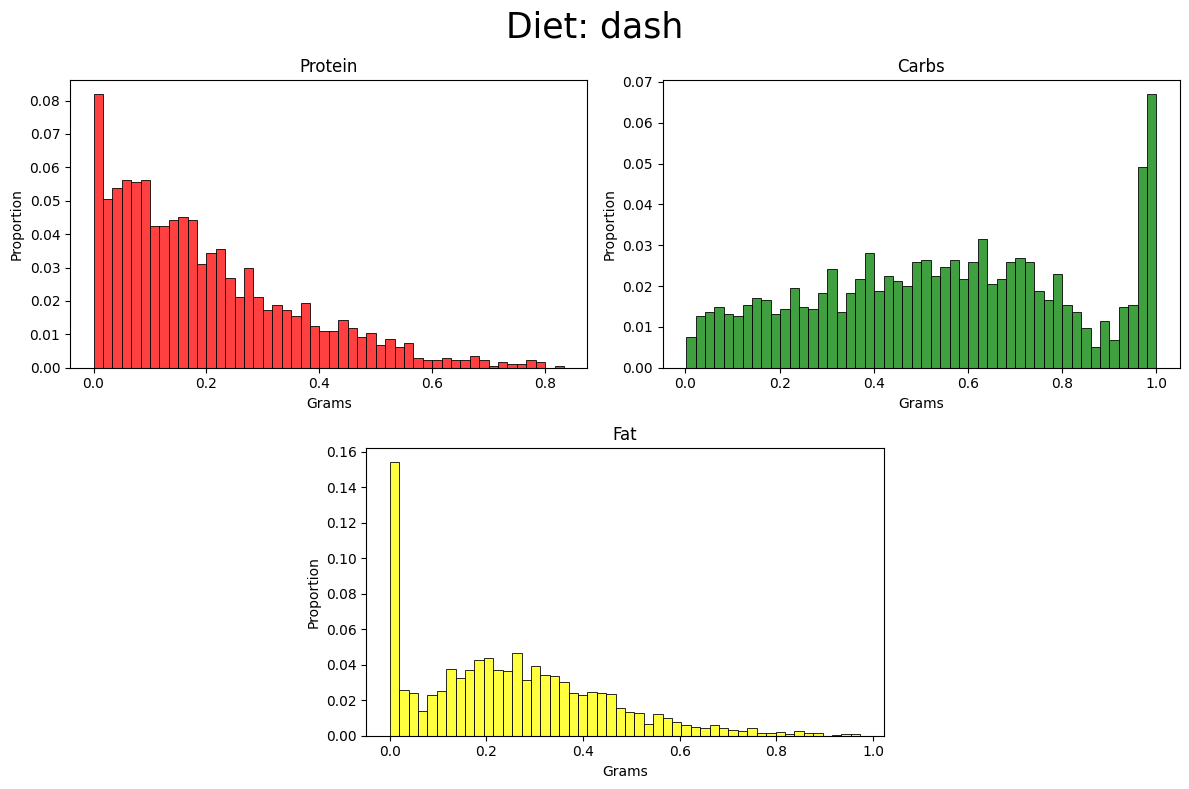

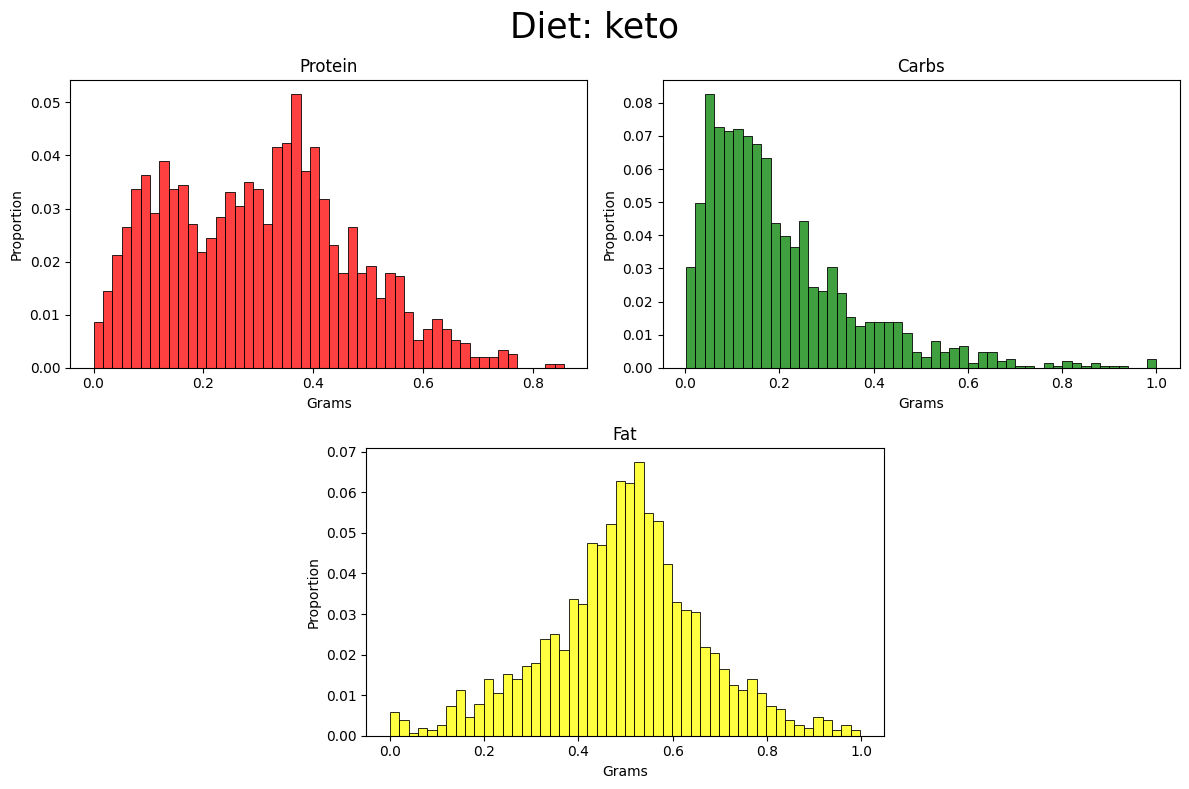

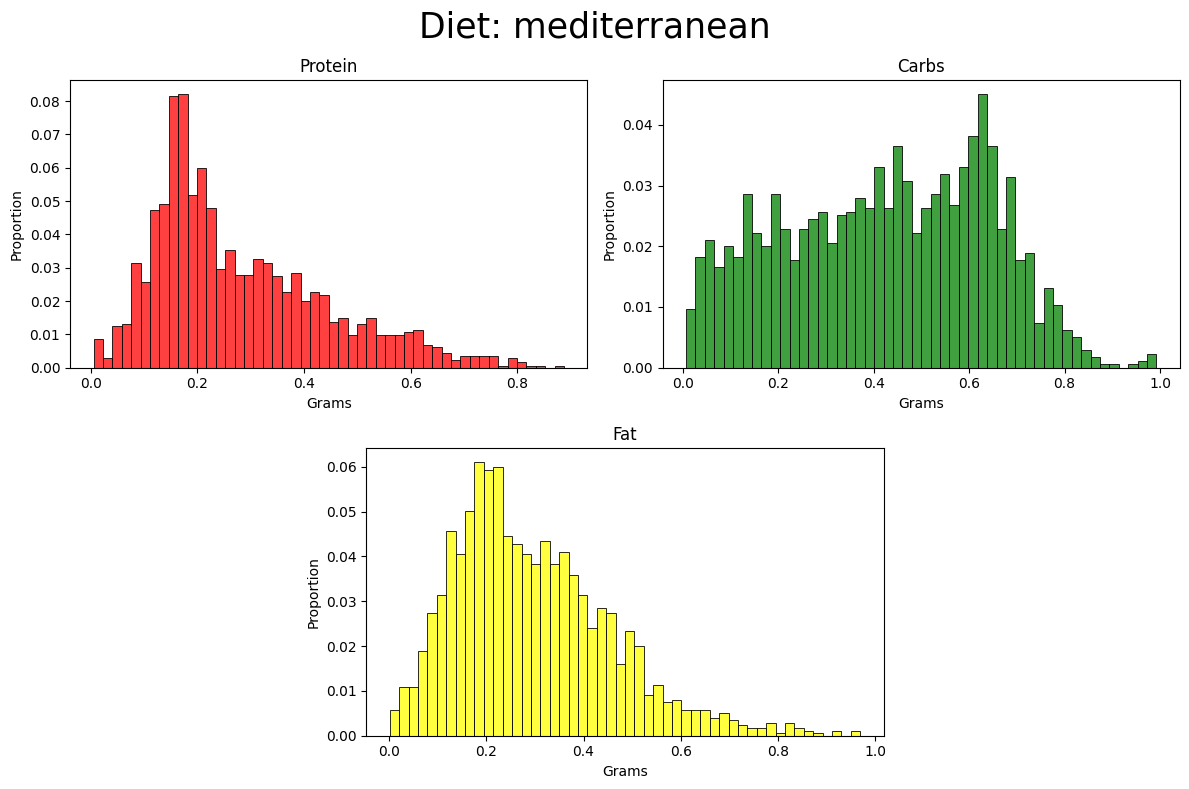

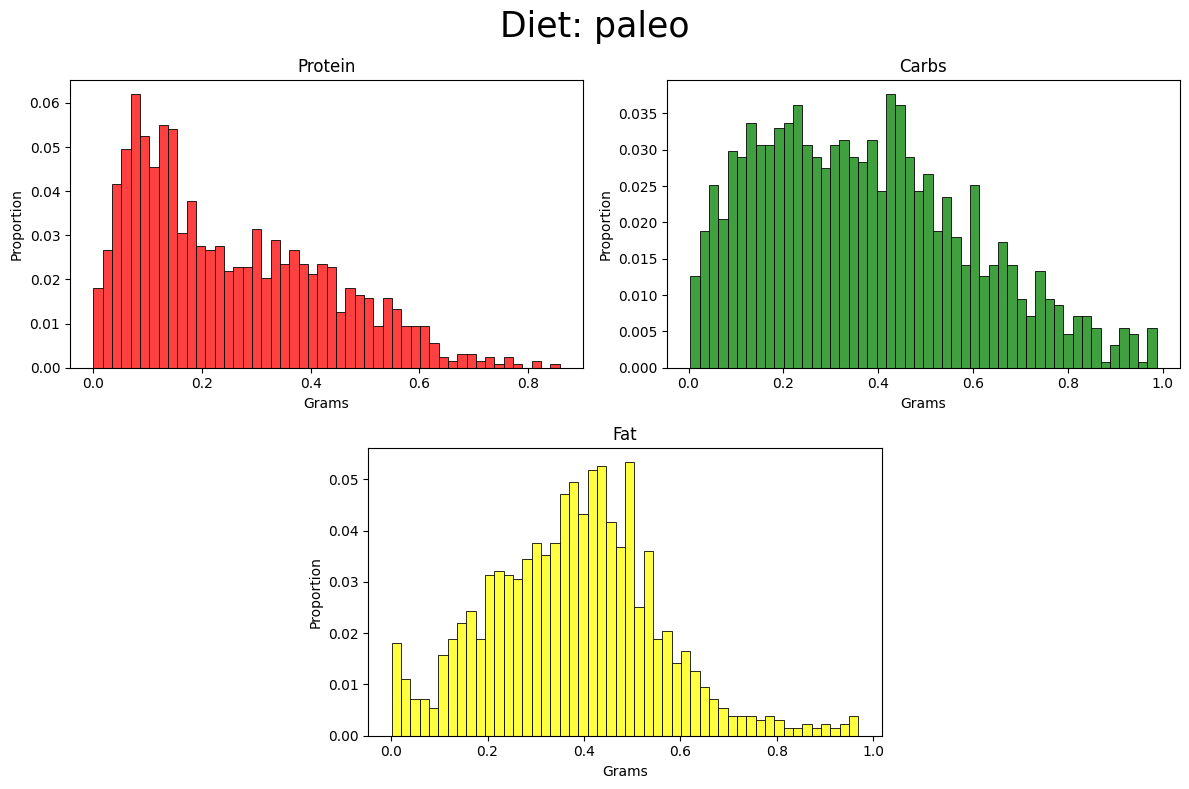

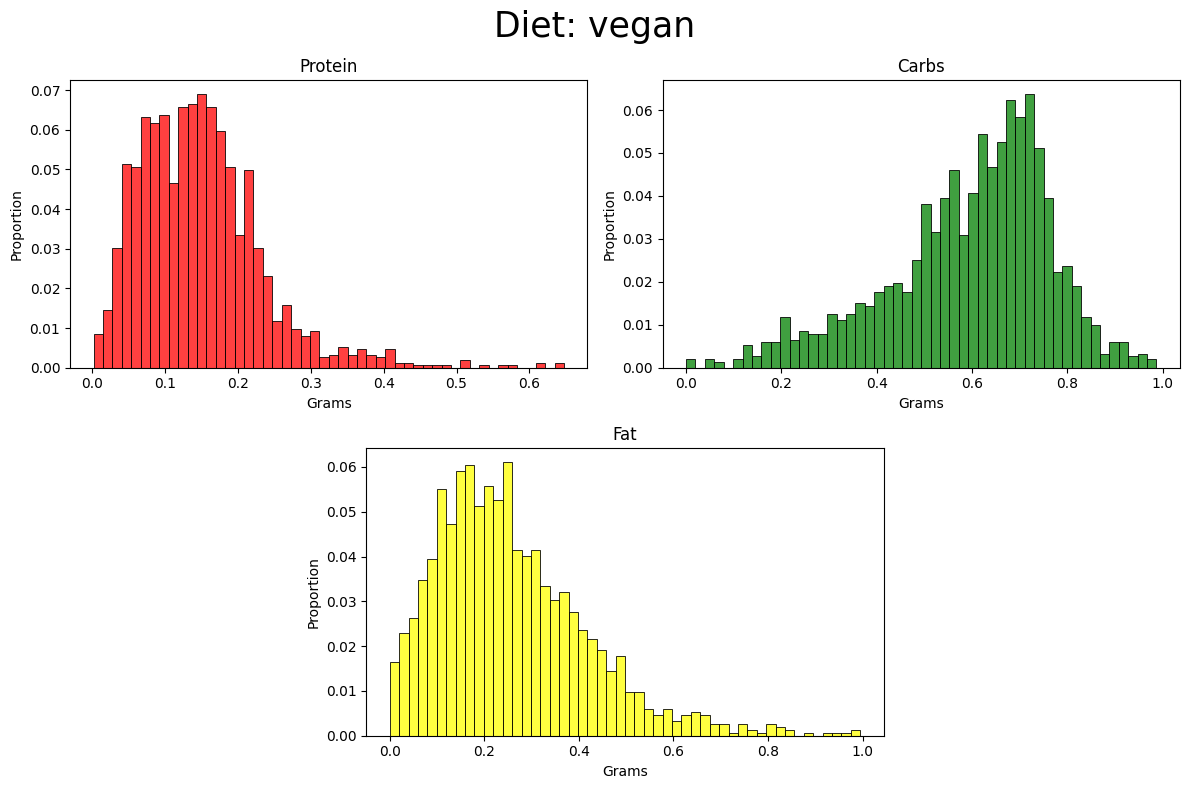

In [11]:
# Plotting of macronutrient values by type of diet

for diet in Diets:
    PlotMacronutientsByDiet(diet)

### Boxplots

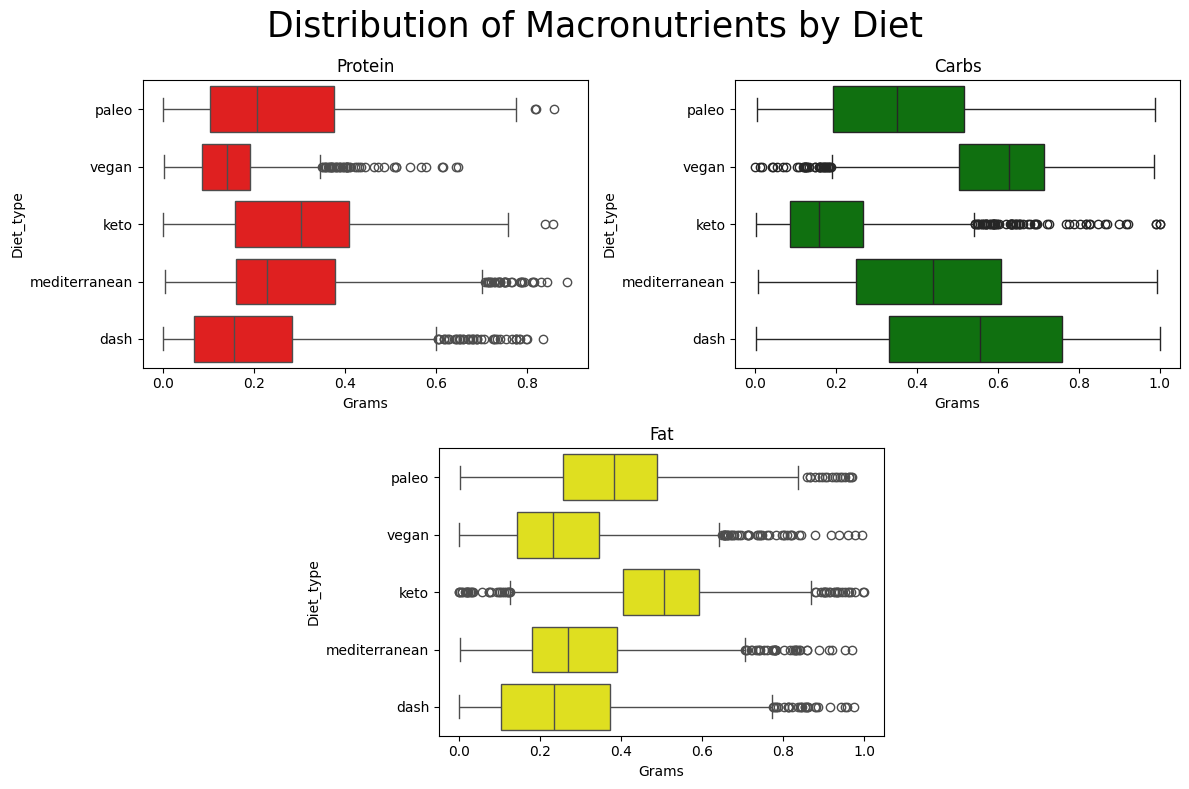

In [14]:
# Plotting of macronutrient values

PlotMacronutrients()

# Correlation by Macronutrient in each Type of Diet

From the correlation matrices and using [[1]](#references), the following is obtained:
* DASH : 

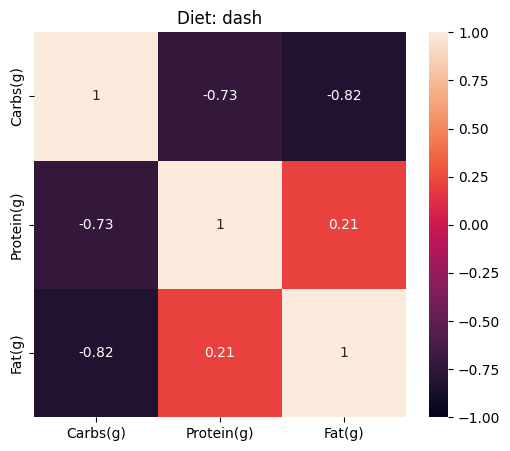

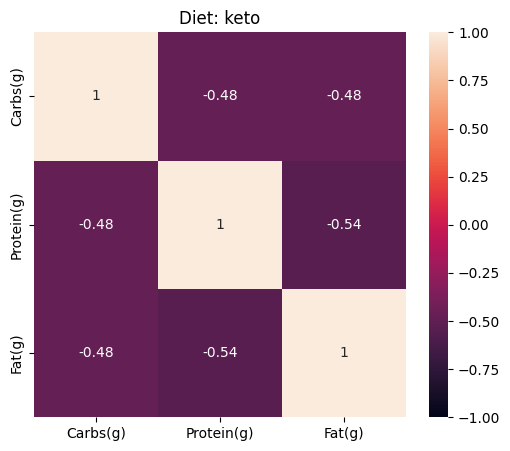

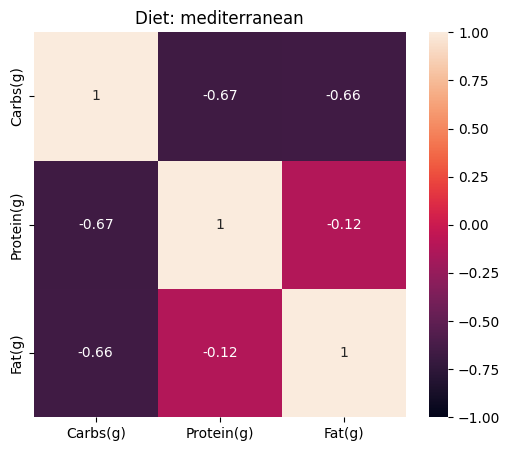

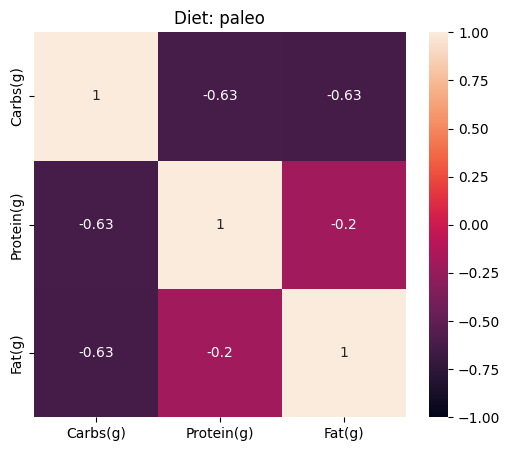

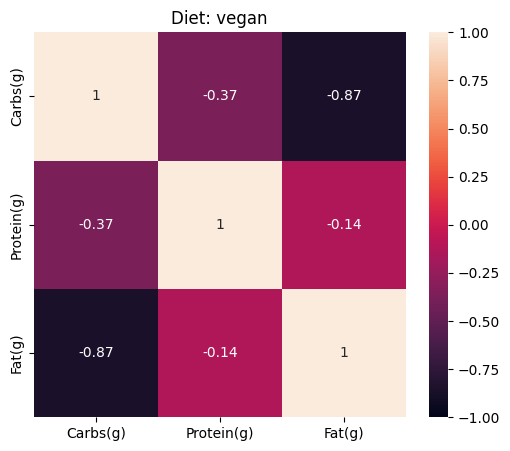

In [27]:
# Plotting correlation matrix

for index_plot , diet in enumerate(Diets):
    fig , axes = plt.subplots(figsize=(6,5))
    sns.heatmap(Diets_Dataset.query("Diet_type == @diet")[Macronutrients].corr(),annot=True,vmin=-1,vmax=1,ax=axes)
    axes.set_title(f"Diet: {diet}")

# References

[1] F. F. Marvasti, “Popular diets and health,” Culinary Medicine, p. 327